In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

In [19]:
variance = pd.read_csv(r'C:\Users\Shrinidhi\Desktop\Thesis\fpkm_top_3000_variance_genes.tsv', sep='\t', index_col=0)

X = variance.drop(columns=['cancer_status']).values

# Convert 'cancer_status' to binary labels 
y = variance['cancer_status'].apply(lambda x: 1 if x == 'cancer' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
svm_model = SVC(kernel='linear', probability=True)

In [21]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [22]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [23]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9843219231774236
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1921
           1       0.98      0.99      0.98      1906

    accuracy                           0.98      3827
   macro avg       0.98      0.98      0.98      3827
weighted avg       0.98      0.98      0.98      3827

Confusion Matrix:
 [[1885   36]
 [  24 1882]]


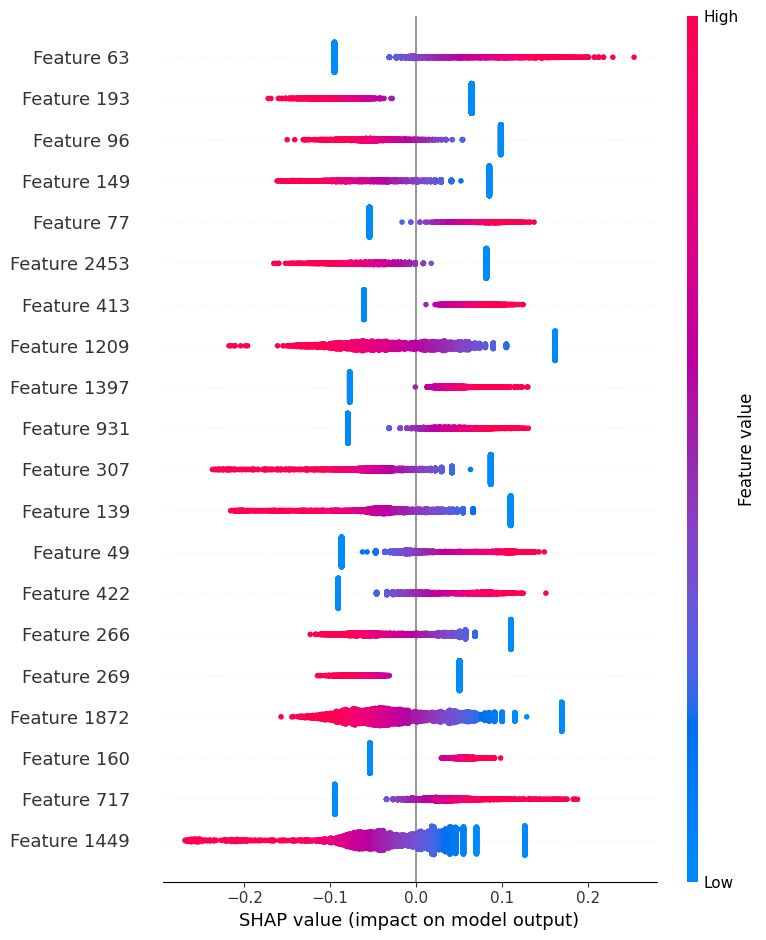

In [24]:
import shap
explainer = shap.LinearExplainer(svm_model, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


Top 10 most important genes based on SHAP values:
1: ENSG00000170373.8 (Mean Absolute SHAP: 0.0775)
2: ENSG00000162840.4 (Mean Absolute SHAP: 0.0745)
3: ENSG00000267436.1 (Mean Absolute SHAP: 0.0710)
4: ENSG00000100146.16 (Mean Absolute SHAP: 0.0651)
5: ENSG00000274630.1 (Mean Absolute SHAP: 0.0633)
6: ENSG00000233521.5 (Mean Absolute SHAP: 0.0632)
7: ENSG00000249908.2 (Mean Absolute SHAP: 0.0618)
8: ENSG00000142973.12 (Mean Absolute SHAP: 0.0598)
9: ENSG00000250568.1 (Mean Absolute SHAP: 0.0598)
10: ENSG00000223814.1 (Mean Absolute SHAP: 0.0584)


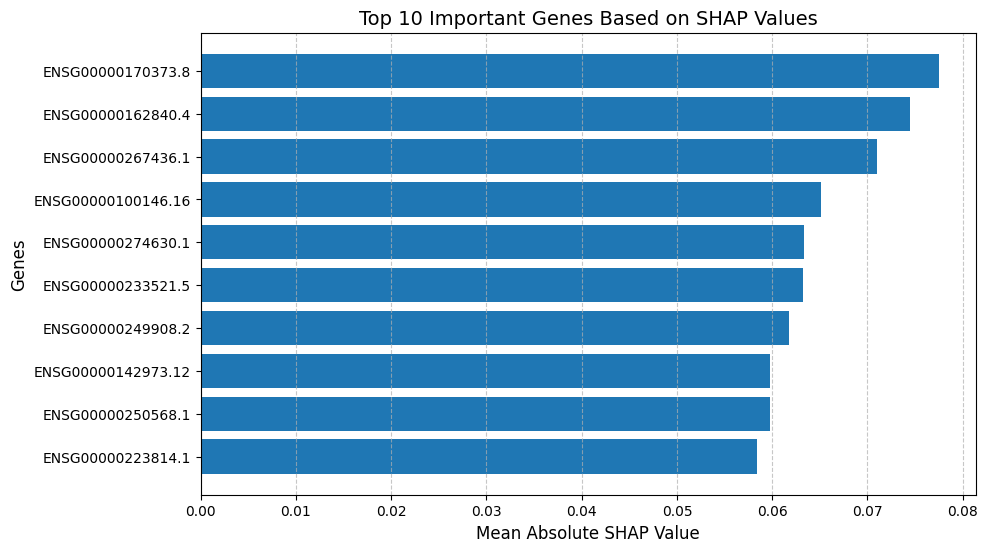

In [32]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# X_test
feature_names = variance.drop(columns=['cancer_status']).columns  

# dict to store shap values and genes
shap_gene_mapping = {}

for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values[:, i]

# Compute the mean absolute SHAP
mean_abs_shap = np.abs(shap_values).mean(axis=0)

#sort
sorted_genes = np.argsort(mean_abs_shap)[::-1]
top_10_genes = [feature_names[i] for i in sorted_genes[:10]]
print("Top 10 most important genes based on SHAP values:")
for i, gene in enumerate(top_10_genes, 1):
    print(f"{i}: {gene} (Mean Absolute SHAP: {mean_abs_shap[sorted_genes[i-1]]:.4f})")

# Plot the top 10 genes by their mean absolute SHAP value
plt.figure(figsize=(10, 6))
plt.barh(top_10_genes[::-1], mean_abs_shap[sorted_genes[:10]][::-1])  
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
plt.ylabel('Genes', fontsize=12)
plt.title('Top 10 Important Genes Based on SHAP Values', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [40]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# X_test
feature_names = variance.drop(columns=['cancer_status']).columns  

# dict to store shap values and genes
shap_gene_mapping = {}

for i, feature_name in enumerate(feature_names):
    shap_gene_mapping[feature_name] = shap_values[:, i]

# Compute the mean absolute SHAP
mean_abs_shap = np.abs(shap_values).mean(axis=0)

#sort
sorted_genes = np.argsort(mean_abs_shap)[::-1]
top_100_genes = [feature_names[i] for i in sorted_genes[:100]]
print("Top 100 most important genes based on SHAP values:")
for i, gene in enumerate(top_100_genes, 1):
    print(f"{i}: {gene} (Mean Absolute SHAP: {mean_abs_shap[sorted_genes[i-1]]:.4f})")

Top 100 most important genes based on SHAP values:
1: ENSG00000170373.8 (Mean Absolute SHAP: 0.0775)
2: ENSG00000162840.4 (Mean Absolute SHAP: 0.0745)
3: ENSG00000267436.1 (Mean Absolute SHAP: 0.0710)
4: ENSG00000100146.16 (Mean Absolute SHAP: 0.0651)
5: ENSG00000274630.1 (Mean Absolute SHAP: 0.0633)
6: ENSG00000233521.5 (Mean Absolute SHAP: 0.0632)
7: ENSG00000249908.2 (Mean Absolute SHAP: 0.0618)
8: ENSG00000142973.12 (Mean Absolute SHAP: 0.0598)
9: ENSG00000250568.1 (Mean Absolute SHAP: 0.0598)
10: ENSG00000223814.1 (Mean Absolute SHAP: 0.0584)
11: ENSG00000170477.12 (Mean Absolute SHAP: 0.0577)
12: ENSG00000171401.14 (Mean Absolute SHAP: 0.0576)
13: ENSG00000230937.9 (Mean Absolute SHAP: 0.0575)
14: ENSG00000251381.6 (Mean Absolute SHAP: 0.0572)
15: ENSG00000169562.9 (Mean Absolute SHAP: 0.0570)
16: ENSG00000233929.1 (Mean Absolute SHAP: 0.0567)
17: ENSG00000143196.4 (Mean Absolute SHAP: 0.0565)
18: ENSG00000207110.1 (Mean Absolute SHAP: 0.0558)
19: ENSG00000214855.9 (Mean Absolute

In [41]:
top_100_df = pd.DataFrame({
    "Gene": top_100_genes,
    "Mean Absolute SHAP": mean_abs_shap[sorted_genes[:100]]
})

top_100_df.to_csv("C://Users//Shrinidhi//Desktop//Thesis//Top 100 genes//SVM//top_100_genes_SHAP_var.csv", index=False)

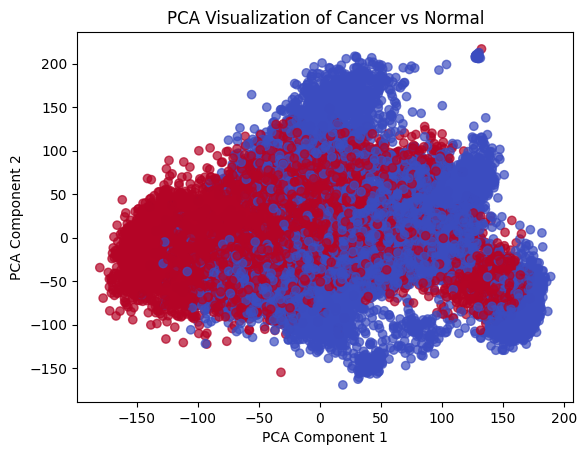

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Cancer vs Normal')
plt.show()


In [27]:
import numpy as np
import lime
import lime.lime_tabular
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [29]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Feature names
feature_names = variance.drop(columns=['cancer_status']).columns.tolist()

# LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, 
    feature_names=feature_names, 
    class_names=['Normal', 'Cancer'], 
    mode='classification'
)

# Dict to store gene names
lime_scores = {gene: [] for gene in variance}

num_samples = len(X_test)  

for idx in range(num_samples):  
    sample = X_test[idx].reshape(1, -1)  
    explanation = explainer.explain_instance(sample.flatten(), svm_model.predict_proba, num_features=len(feature_names))  
    
    # Store feature importance values
    for feature, score in explanation.as_list():
        gene = feature.split()[0]  # Extract gene name 
        if gene in lime_scores:  
            lime_scores[gene].append(score)

# Compute mean importance scores 
lime_avg_scores = {gene: np.mean(scores) for gene, scores in lime_scores.items() if scores}  


lime_df = pd.DataFrame(list(lime_avg_scores.items()), columns=["Gene", "Mean LIME Score"])
lime_df = lime_df.sort_values(by="Mean LIME Score", ascending=False)

# Print top 10 most important genes
top_10_genes = lime_df.head(100)
print("\nTop 10 Most Important Genes Based on LIME:")
print(top_10_genes)

# Plot the top 10 global important genes
plt.figure(figsize=(10, 6))
plt.barh(top_10_genes["Gene"][::-1], top_10_genes["Mean LIME Score"][::-1])  
plt.xlabel("Mean LIME Score")
plt.ylabel("Genes")
plt.title("Global Top 10 Important Genes (LIME)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


KeyboardInterrupt: 